<a href="https://colab.research.google.com/github/rootofdata/kostat_AI_contest/blob/main/literacy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/통계청_AI경진대회/실습용 자료/1. 실습용자료.txt', sep ='|',encoding='CP949', header=0)

submission= pd.read_csv('/content/drive/MyDrive/통계청_AI경진대회/모델 개발용 자료/2. 모델개발용자료.txt', sep ='|',encoding='CP949', header=0)

In [ ]:
data

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육
...,...,...,...,...,...,...,...
999995,id_0999996,C,13,134,제품입고,워싱,청바지워싱
999996,id_0999997,F,42,424,현장에서,고객의요청에의해,실내인테리어
999997,id_0999998,G,47,474,영업점에서,일반소비자에게,여성의류 판매
999998,id_0999999,P,85,856,사업장에서,일반고객을대상으로,필라테스


In [ ]:
submission

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_000001,NaN,NaN,NaN,치킨전문점에서,고객의주문에의해,치킨판매
1,id_000002,NaN,NaN,NaN,산업공구,다른 소매업자에게,철물 수공구
2,id_000003,NaN,NaN,NaN,절에서,신도을 대상으로,불교단체운영
3,id_000004,NaN,NaN,NaN,영업장에서,고객요구로,자동차튜닝
4,id_000005,NaN,NaN,NaN,실내포장마차에서,접객시설을 갖추고,"소주,맥주제공"
...,...,...,...,...,...,...,...
99995,id_099996,NaN,NaN,NaN,사업장에서,일반인대상으로,버섯농장
99996,id_099997,NaN,NaN,NaN,한의원에서,외래환자위주고,치료
99997,id_099998,NaN,NaN,NaN,일반점포에서,소비자에게,그림판매
99998,id_099999,NaN,NaN,NaN,사업장에서,일반인.학생대상으로,학습공간제공


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


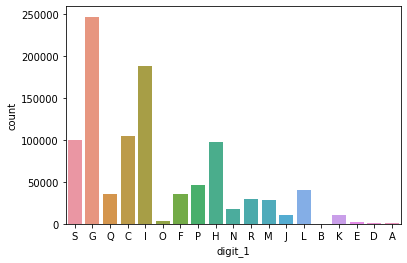

In [ ]:
sns.countplot(data['digit_1'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


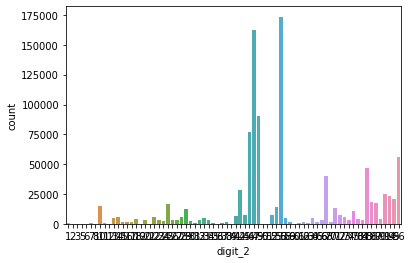

In [ ]:
sns.countplot(data['digit_2'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


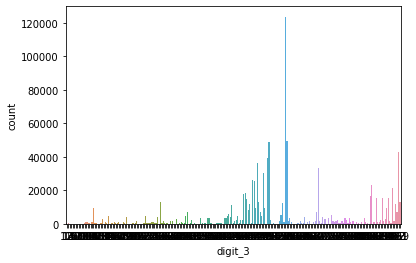

In [ ]:
sns.countplot(data['digit_3'])

## 데이터 분포가 제각각이라 증강도 해결 포인트로 잡아도 될듯

## 대분류 코드도 인코딩 필요해보임

In [ ]:
data.head(10)

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육
5,id_0000006,C,29,291,철,절삭.용접,카프라배관자재
6,id_0000007,I,56,561,음식점에서,접객시설을 갖추고,참치회(일본식)
7,id_0000008,C,10,107,쌀을 가지고,가공하여,떡제조
8,id_0000009,O,84,841,시청에서 재정과인력,일반공공행정,지방행정 집행
9,id_0000010,F,42,423,영업장에서,고객의뢰를 받아,내부전기공사


## NLP데이터에 조사가 꽤 많음
text_obj(input)	text_mthd(process)	text_deal(output)
이렇게 이해해도 될듯

In [ ]:
col = ['text_obj','text_mthd','text_deal']
NLP = data[col].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
NLP.head(100)

0           카센터에서 자동차부분정비 타이어오일교환
1         상점내에서 일반인을 대상으로 채소.과일판매
2     절단하여사업체에도매 공업용고무를가지고 합성고무도매
3            영업점에서 일반소비자에게 열쇠잠금장치
4        어린이집 보호자의 위탁을 받아 취학전아동보육
                 ...             
95               미용실 두발미용 서비스 컷.펌
96             상가에서 소매업자에게 도매 티셔츠
97               안경점 일반소비자에게 안경소매
98           사업장에서 아파트를 위해 아파트 관리
99          목재,페인트로 간판의뢰를받아 목간판제조
Length: 100, dtype: object

In [ ]:
df = data[['AI_id','digit_3']].copy()
df['NLP'] = NLP

In [ ]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거합니다.
import re
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타냅니다.
    result = hangul.sub('', text)
    return result

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 6.5 MB/s 
     |████████████████████████████████| 448 kB 50.8 MB/s 


In [ ]:
from konlpy.tag import *

hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [ ]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [ ]:
tagsets = pd.DataFrame()
N = 18
tagsets["OKT-기호"] = list(okt.tagset.keys()) + list("*" * (N - len(okt.tagset)))
tagsets["OKT-품사"] = list(okt.tagset.values()) + list("*" * (N - len(okt.tagset)))
tagsets

,OKT-기호,OKT-품사
0,Adjective,형용사
1,Adverb,부사
2,Alpha,알파벳
3,Conjunction,접속사
4,Determiner,관형사
5,Eomi,어미
6,Exclamation,감탄사
7,Foreign,"외국어, 한자 및 기타기호"
8,Hashtag,트위터 해쉬태그
9,Josa,조사


In [ ]:
for i in NLP:
  text_cleaning(i)

In [ ]:
NLP

0               카센터에서 자동차부분정비 타이어오일교환
1             상점내에서 일반인을 대상으로 채소.과일판매
2         절단하여사업체에도매 공업용고무를가지고 합성고무도매
3                영업점에서 일반소비자에게 열쇠잠금장치
4            어린이집 보호자의 위탁을 받아 취학전아동보육
                     ...             
999995                  제품입고 워싱 청바지워싱
999996           현장에서 고객의요청에의해 실내인테리어
999997          영업점에서 일반소비자에게 여성의류 판매
999998           사업장에서 일반고객을대상으로 필라테스
999999      사업장에서 접객시설을 갖추고 한식(미역구)판매
Length: 1000000, dtype: object

In [ ]:
from nltk import Text
# for i in range(10):
#   a.append(okt.nouns(NLP[i]))
kolaw = Text(NLP, name="kolaw")
kolaw[1]

'상점내에서 일반인을 대상으로 채소.과일판매'

#전처리계획
- 한국표준산업분류에 있는 데이터도 학습데이터로 사용하면 좋을듯
- text구조가 input -> process -> output으로 진행되는 느낌이라 3가지 연속으로 합치면 될듯
- Word2vec으로 구분해서, 카테고리화 하면 될듯
- 라벨은 굳이 3개 다안하고 마지막 라벨만 가져와도 될듯..
- 데이터의 비율이 안맞는 부분도 해결이 필요함(분류별 데이터의 수)

- 결론 : 텍스트 데이터를 Word2vec으로 분류를 해서 이를 바탕으로 분류코드를 예측하는 것. -> 평가지표 : accuracy, F1-score

In [ ]:
data.head()

,AI_id,digit_1,digit_2,digit_3,text_obj,text_mthd,text_deal
0,id_0000001,S,95,952,카센터에서,자동차부분정비,타이어오일교환
1,id_0000002,G,47,472,상점내에서,일반인을 대상으로,채소.과일판매
2,id_0000003,G,46,467,절단하여사업체에도매,공업용고무를가지고,합성고무도매
3,id_0000004,G,47,475,영업점에서,일반소비자에게,열쇠잠금장치
4,id_0000005,Q,87,872,어린이집,보호자의 위탁을 받아,취학전아동보육


In [ ]:
NLP
#sep을 추가하고 그 것을 기준으로 idx부여

0               카센터에서 자동차부분정비 타이어오일교환
1             상점내에서 일반인을 대상으로 채소.과일판매
2         절단하여사업체에도매 공업용고무를가지고 합성고무도매
3                영업점에서 일반소비자에게 열쇠잠금장치
4            어린이집 보호자의 위탁을 받아 취학전아동보육
                     ...             
999995                  제품입고 워싱 청바지워싱
999996           현장에서 고객의요청에의해 실내인테리어
999997          영업점에서 일반소비자에게 여성의류 판매
999998           사업장에서 일반고객을대상으로 필라테스
999999      사업장에서 접객시설을 갖추고 한식(미역구)판매
Length: 1000000, dtype: object

In [ ]:
tokenized_contents = []
for i in range(len(NLP)):
  tokenized_contents.append(okt.pos(NLP[i]))

In [ ]:
tokenized_contents

[[('카', 'Noun'),
  ('센터', 'Noun'),
  ('에서', 'Josa'),
  ('자동차', 'Noun'),
  ('부분', 'Noun'),
  ('정비', 'Noun'),
  ('타이어', 'Noun'),
  ('오일', 'Noun'),
  ('교환', 'Noun')],
 [('상점', 'Noun'),
  ('내', 'Noun'),
  ('에서', 'Josa'),
  ('일반인', 'Noun'),
  ('을', 'Josa'),
  ('대상', 'Noun'),
  ('으로', 'Josa'),
  ('채소', 'Noun'),
  ('.', 'Punctuation'),
  ('과일', 'Noun'),
  ('판매', 'Noun')],
 [('절단', 'Noun'),
  ('하여사', 'Verb'),
  ('업체', 'Noun'),
  ('에도', 'Josa'),
  ('매', 'Noun'),
  ('공업', 'Noun'),
  ('용', 'Noun'),
  ('고무', 'Noun'),
  ('를', 'Josa'),
  ('가지', 'Noun'),
  ('고', 'Josa'),
  ('합성', 'Noun'),
  ('고무', 'Noun'),
  ('도매', 'Noun')],
 [('영업', 'Noun'),
  ('점', 'Noun'),
  ('에서', 'Josa'),
  ('일', 'Modifier'),
  ('반', 'Modifier'),
  ('소비자', 'Noun'),
  ('에게', 'Josa'),
  ('열쇠', 'Noun'),
  ('잠금장치', 'Noun')],
 [('어린이집', 'Noun'),
  ('보호자', 'Noun'),
  ('의', 'Josa'),
  ('위탁', 'Noun'),
  ('을', 'Josa'),
  ('받아', 'Verb'),
  ('취학', 'Noun'),
  ('전', 'Modifier'),
  ('아동', 'Noun'),
  ('보육', 'Noun')],
 [('철', 'Noun'),
  ('절삭', 

In [ ]:
from gensim.models import Word2Vec
embedding_model = Word2Vec(cf, size=100, window = 10, min_count=50, workers=4, iter=100, sg=1)

In [ ]:
embedding_model.save('/content/drive/MyDrive/통계청_AI경진대회/한성/korean_standard.model')

In [ ]:
ks = pd.read_csv('/content/drive/MyDrive/통계청_AI경진대회/한국표준산업분류(10차)_국문_test.csv',encoding='CP949')

NameError: ignored

In [ ]:
input = ks['Unnamed: 7'].dropna(axis=0)
input = input.drop(input.index[0])
input = input.reset_index(drop=True)
input.head()
#word2vec 유클리드 공간에 단어의 위치
#similar 새로운 단어 들어오면 어느 공간에 위치 하고 그 위치와 제일 가까운 단어는 뭐냐?
#한국분류코드가 제일 높은 가중치를 가졌으면 한다.

0        곡물 및 기타 식량작물 재배업
1       채소, 화훼작물 및 종묘 재배업
2    과실, 음료용 및 향신용 작물 재배업
3               기타 작물 재배업
4                시설작물 재배업
Name: Unnamed: 7, dtype: object

In [ ]:
model = Word2Vec.load('/content/drive/MyDrive/통계청_AI경진대회/한성/korean_standard.model')
for i in input:
  try:
      arrSimilar = model.wv.most_similar(i)
      print(i,':',arrSimilar)
  except:
      print(i,':',"탐색 불가")
#띄어쓰기 제거해봐서 다시


곡물 및 기타 식량작물 재배업 : 탐색 불가
채소, 화훼작물 및 종묘 재배업 : 탐색 불가
과실, 음료용 및 향신용 작물 재배업 : 탐색 불가
기타 작물 재배업 : 탐색 불가
시설작물 재배업 : 탐색 불가
소 사육업 : 탐색 불가
양돈업 : 탐색 불가
가금류 및 조류 사육업 : 탐색 불가
기타 축산업 : 탐색 불가
작물재배 및 축산 복합농업 : 탐색 불가
작물재배 관련 서비스업 : 탐색 불가
축산 관련 서비스업 : 탐색 불가
수렵 및 관련 서비스업 : 탐색 불가
영림업 : 탐색 불가
벌목업 : 탐색 불가
임산물 채취업 : 탐색 불가
임업 관련 서비스업 : 탐색 불가
해수면 어업 : 탐색 불가
내수면 어업 : 탐색 불가
양식 어업 : 탐색 불가
어업 관련 서비스업 : 탐색 불가
석탄 광업 : 탐색 불가
원유 및 천연가스 채굴업 : 탐색 불가
철 광업 : 탐색 불가
비철금속 광업 : 탐색 불가
석회석 및 점토 광업 : 탐색 불가
석재, 쇄석 및 모래, 자갈 채취업 : 탐색 불가
화학용 및 비료 원료용 광물 광업 : 탐색 불가
천일염 생산 및 암염 채취업 : 탐색 불가
그 외 기타 비금속광물 광업 : 탐색 불가
광업 지원 서비스업 : 탐색 불가
도축업 : 탐색 불가
육류 가공 및 저장 처리업 : 탐색 불가
수산동물 가공 및 저장 처리업 : 탐색 불가
수산식물 가공 및 저장 처리업 : 탐색 불가
과실, 채소 가공 및 저장 처리업 : 탐색 불가
동물성 및 식물성 유지 제조업 : 탐색 불가
낙농제품 및 식용 빙과류 제조업 : 탐색 불가
곡물 가공품 제조업 : 탐색 불가
전분제품 및 당류 제조업 : 탐색 불가
떡, 빵 및 과자류 제조업 : 탐색 불가
설탕 제조업 : 탐색 불가
면류, 마카로니 및 유사 식품 제조업 : 탐색 불가
조미료 및 식품 첨가물 제조업 : 탐색 불가
도시락 및 식사용 조리식품 제조업 : 탐색 불가
기타 식료품 제조업 : 탐색 불가
동물용 사료 및 조제식품 제조업 : 탐색 불가
발효주 제조업 : 탐색 불가
증류주 및 합성주 제조업 : 탐색 불가
비알코올

*이탤릭체 텍스트*- 한국 국문 표준 분류체계와 유사도가 높은 것을 기준으로도 매핑하면 좋은 의미가 있지 않을까?

In [ ]:
word_df = pd.DataFrame(model.wv.index2word)
word_df.to_csv('/content/drive/MyDrive/통계청_AI경진대회/한성/wv_word_tsv.tsv', sep = '\t', index = False)

In [ ]:
df = pd.DataFrame(model.wv.vectors)
df.to_csv('/content/drive/MyDrive/통계청_AI경진대회/한성/wv_model_tsv.tsv', sep = '\t', index = False)